<a href="https://colab.research.google.com/github/shainaboover/DS-Unit-1-Sprint-2-Statistics/blob/master/SHAINA_BOOVER_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
# imports
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-25 17:58:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-05-25 17:58:38 (633 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [3]:
# read in data
# fix nan values, name columns
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
votes = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')
votes. head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [4]:
# change to binary format
votes = votes.replace({'y':1, 'n':0})
votes.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [5]:
# choose issue to focus on
fee_freeze = votes['physician-fee-freeze'].dropna()
print(fee_freeze.isnull().sum())
fee_freeze.shape

0


(424,)

In [6]:
# look at mean
fee_freeze.mean()

0.41745283018867924

In [0]:
#  define confidence interval
# s = standard deviation of the sample
# n = sample size
# t = test statistic
# X = sample mean
# As sample size goes up, the standard error (i.e., the spread of our error) gets tighter.
def conf_int(data, confidence=0.95):
  mydata = np.array(fee_freeze)
  mymean = np.mean(fee_freeze)
  n = len(fee_freeze)
  stderr = np.std(fee_freeze, ddof=1)/ np.sqrt(n)
  margin = stderr*stats.t.ppf((1 + confidence)/ 2, n-1)
  return (mymean, mymean - margin, mymean + margin)

In [8]:
# returns mean, lower bound, and upper bound
# we can say with 95% confidence that the mean of the 
# population falls between 37%-46%
conf_int(fee_freeze)

(0.41745283018867924, 0.37032346810896233, 0.46458219226839614)

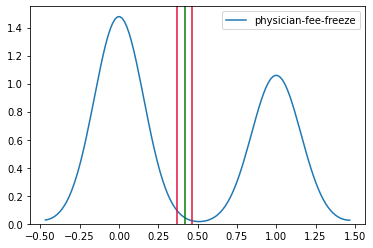

In [9]:
# graphic representation
sns.kdeplot(fee_freeze)
# use index to show lower bound, upper bound, and mean
CI = conf_int(fee_freeze)
plt.axvline(x=CI[1], color='crimson')
plt.axvline(x=CI[2], color='crimson')
plt.axvline(x=CI[0], color='green');

From the confidence interval above, I can say with 95% confidence that the mean of the population is contained in the upper and lower bounds of this sample.

In [18]:
# find pvalue
# high p value means we fail to reject the null hypothesis 
# this might be redundant
ttest_1samp(fee_freeze, fee_freeze.mean())

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [0]:
# chi squared testing
# source of data
url='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [66]:
# read in data and look at head
census = pd.read_csv(url)
census.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [91]:
# I want to compare income with totalpop
# look at income values in prep to bin
print(census['Income'].value_counts().sort_index())
census['Income'].describe()

11680     1
12653     1
12820     1
13413     1
13462     1
         ..
112138    1
114795    1
115576    1
117515    1
129588    1
Name: Income, Length: 3074, dtype: int64


count      3220.000000
mean      48994.966770
std       13877.178398
min       11680.000000
25%       40622.000000
50%       47636.500000
75%       55476.000000
max      129588.000000
Name: Income, dtype: float64

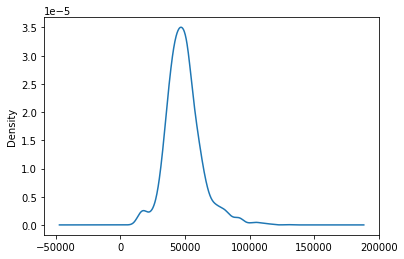

In [76]:
# look at a visual representation
census['Income'].plot(kind='density');

In [128]:
# bin income values
cut_points = [10000, 39000, 49000, 59000, 130000]
my_labels = ['vlow', 'low', 'avg', 'high']
census['Income_cats'] = pd.cut(census['Income'], cut_points, labels=my_labels)
census[['Income', 'Income_cats']]

,Income,Income_cats
0,55317,avg
1,52562,avg
2,33368,vlow
3,43404,low
4,47412,low
...,...,...
3215,18900,vlow
3216,16261,vlow
3217,19893,vlow
3218,15586,vlow


In [129]:
# check work
census['Income_cats'].value_counts().sort_index()

vlow     661
low     1089
avg      898
high     572
Name: Income_cats, dtype: int64

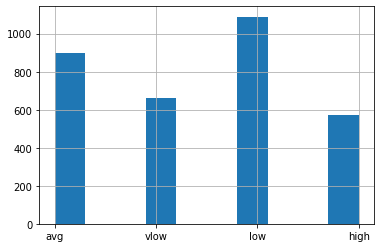

In [130]:
# visualize it
census['Income_cats'].hist();

In [131]:
# take a look at population data
print(census['TotalPop'].value_counts().sort_index())
census['TotalPop'].describe()

74          1
86          1
289         1
421         1
432         1
           ..
3283665     1
4155501     1
4525519     1
5238541     1
10105722    1
Name: TotalPop, Length: 3175, dtype: int64


count    3.220000e+03
mean     1.007681e+05
std      3.244996e+05
min      7.400000e+01
25%      1.121350e+04
50%      2.584750e+04
75%      6.660825e+04
max      1.010572e+07
Name: TotalPop, dtype: float64

In [133]:
# bin them
cut_points2 = [50, 12000, 26000, 68000, 11000000]
my_labels2 = ['small', 'med', 'large', 'xlarge']
census['TotalPop_cats'] = pd.cut(census['TotalPop'], cut_points2, labels=my_labels2)
census[['TotalPop', 'TotalPop_cats']]
census['TotalPop_cats'].value_counts()

small     853
large     813
xlarge    794
med       760
Name: TotalPop_cats, dtype: int64

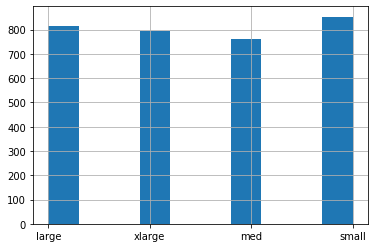

In [134]:
# visualize it
census['TotalPop_cats'].hist();

In [159]:
# create crosstab to look at 2 columns
xtab = pd.crosstab(census['Income_cats'], census['TotalPop_cats'])
xtab

TotalPop_cats,small,med,large,xlarge
Income_cats,,,,
vlow,209,254,163,35
low,302,271,313,203
avg,248,167,234,249
high,94,68,103,307


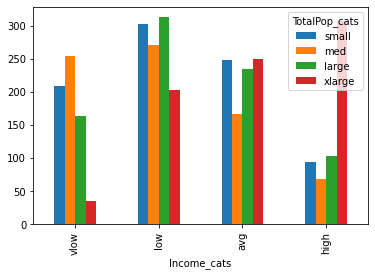

In [160]:
# visualize it
xtab.plot(kind='bar');

In [162]:
xtab_margins = pd.crosstab(census['Income_cats'], census['TotalPop_cats'], margins=True)
xtab_margins

TotalPop_cats,small,med,large,xlarge,All
Income_cats,,,,,
vlow,209,254,163,35,661
low,302,271,313,203,1089
avg,248,167,234,249,898
high,94,68,103,307,572
All,853,760,813,794,3220


In [183]:
# get row sums
row_sums = xtab_margins.iloc[0:4, 4].values
row_sums

array([ 661, 1089,  898,  572])

In [185]:
# get col sums
col_sums = xtab_margins.iloc[4, 0:4].values
col_sums

array([853, 760, 813, 794])

In [188]:
# get totals
total = xtab_margins.loc['All', 'All']
total

3220

In [191]:
# above are the observations
# if null hypothesis is true, what would expected values be?
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
pd.DataFrame(expected)
# this is what we would expect if there was no difference between 
# population size and income

,0,1,2,3
0,175.103416,156.012422,166.892236,162.991925
1,288.483540,257.031056,274.955590,268.529814
2,237.886335,211.950311,226.731056,221.432298
3,151.526708,135.006211,144.421118,141.045963


In [192]:
# this is what we observe
xtab_margins

TotalPop_cats,small,med,large,xlarge,All
Income_cats,,,,,
vlow,209,254,163,35,661
low,302,271,313,203,1089
avg,248,167,234,249,898
high,94,68,103,307,572
All,853,760,813,794,3220


In [195]:
# define observed values
observed = xtab.values
pd.DataFrame(observed)

,0,1,2,3
0,209,254,163,35
1,302,271,313,203
2,248,167,234,249
3,94,68,103,307


In [197]:
# now compare these with chi squared stat using numpy
# first define chi_squared
chi_squared = ((observed - expected)**2/(expected)).sum()
chi_squared

467.21675932000574

In [199]:
# then define degrees of freedom
dof = (len(row_sums)-1)* (len(col_sums)-1)
dof 

9

In [200]:
# now run chi squared test using scipy
chi_squared

467.21675932000574

In [202]:
# outputs are chi_squared stat, pvalue, dof, array of expected values
stats.chi2_contingency(observed)

(467.21675932000574,
 5.967089077957778e-95,
 9,
 array([[175.10341615, 156.01242236, 166.89223602, 162.99192547],
        [288.48354037, 257.0310559 , 274.95559006, 268.52981366],
        [237.8863354 , 211.95031056, 226.7310559 , 221.43229814],
        [151.52670807, 135.00621118, 144.42111801, 141.04596273]]))

In [203]:
# make it readable
print('stat', stats.chi2_contingency(observed)[0])
print('pvalue', stats.chi2_contingency(observed)[1])
print('dof', stats.chi2_contingency(observed)[2])
pd.DataFrame(stats.chi2_contingency(observed)[3])
# because of the low pvalue, we reject null hypothesis that
# population size and income are independent of one another

stat 467.21675932000574
pvalue 5.967089077957778e-95
dof 9


,0,1,2,3
0,175.103416,156.012422,166.892236,162.991925
1,288.483540,257.031056,274.955590,268.529814
2,237.886335,211.950311,226.731056,221.432298
3,151.526708,135.006211,144.421118,141.045963


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)